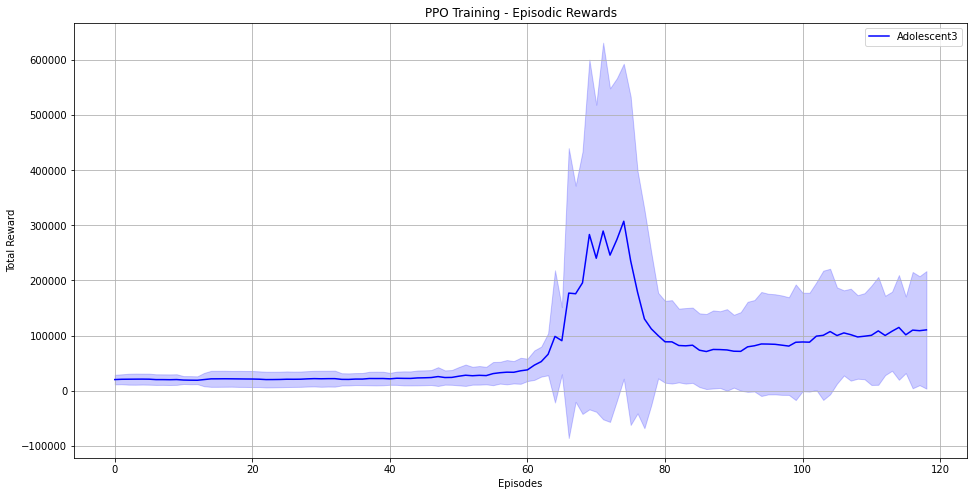

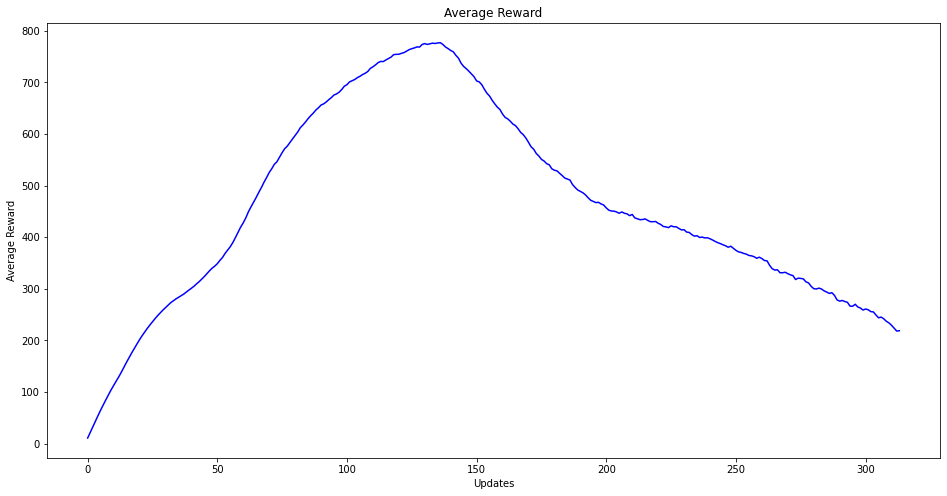

In [81]:
from core import get_avg, get_concat
from matplotlib import pyplot as plt
import matplotlib.gridspec
import numpy as np
import pandas as pd
import json
%matplotlib inline

MAIN_PATH = '../results/ppo_lstm_12_avg_rew/'
with open(MAIN_PATH + 'args.json') as json_file:
    args = json.load(json_file)
training_workers = args['n_training_workers']
testing_workers = args['n_testing_workers']
training_seeds = [x for x in range(0, training_workers)]
testing_seeds = [500+x for x in range(0, testing_workers)]

# Agent training rewards...
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
data = get_avg(MAIN_PATH, training_seeds, '/training/data/reward_summary_', 'reward')
ma, mstd = data['mean'], data['std_dev']
ax.plot(ma, '-b', label="Adolescent3")
ax.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color="b", alpha=0.2)
ax.set_title('PPO Training - Episodic Rewards')
ax.legend(loc="upper right")
ax.set_ylabel('Total Reward')
ax.set_xlabel('Episodes')
ax.grid()
plt.show()

# 
explained_var = pd.read_csv(MAIN_PATH + '/explained_var.csv')
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.plot(explained_var['avg_rew'], '-b', label="Average Reward")
ax.set_title('Average Reward')
ax.set_xlabel('Updates')
ax.set_ylabel('Average Reward')
plt.show()


# Expected state value...
# fig = plt.figure(figsize=(16, 8))
# ax = fig.add_subplot(111)
# data = get_avg(MAIN_PATH, training_seeds, '/training/data/expected_state_value_', 'expected_vs')
# ma, mstd = data['mean'], data['std_dev']
# ax.plot(ma, '-b', label="Adolescent3")
# ax.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color="b", alpha=0.2)
# ax.set_title('V(s)')
# ax.legend(loc="upper right")
# ax.set_ylabel('V(s)')
# ax.set_xlabel('Updates')
# ax.grid()
# plt.show()

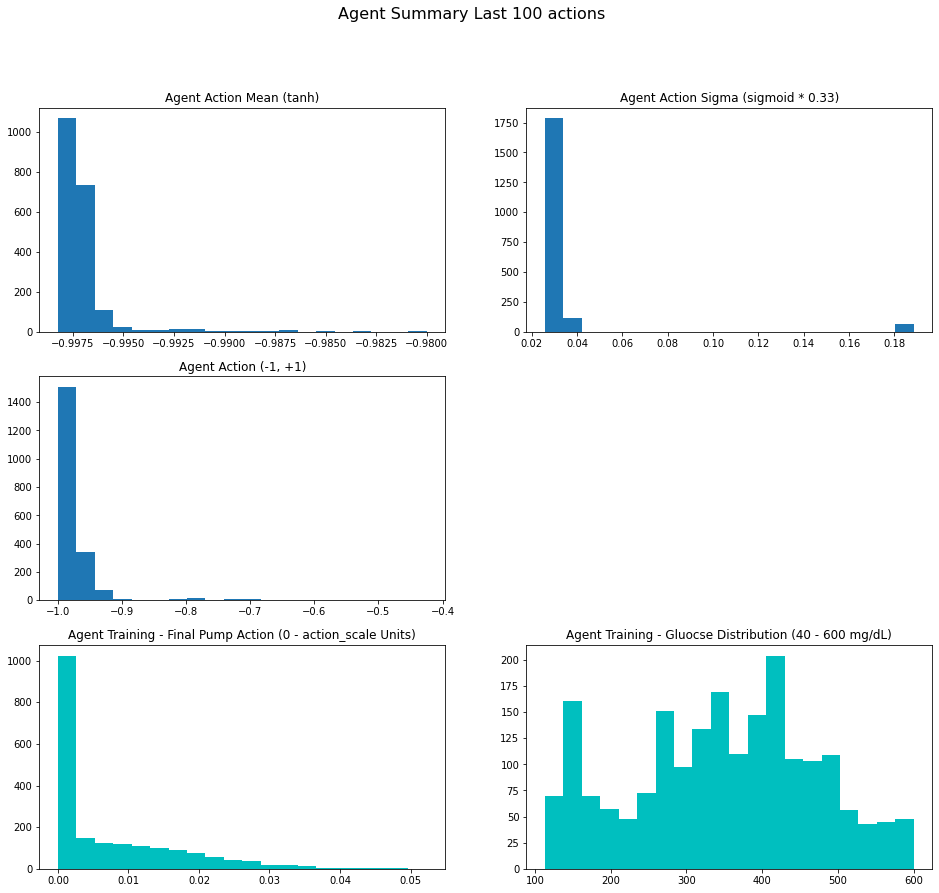

In [77]:
# Agent training debug...
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax1_1 = fig.add_subplot(323)
ax2 = fig.add_subplot(325)
ax3 = fig.add_subplot(326)
ax.hist(get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'mean'), bins = 20)
ax1.hist(get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'std'), bins = 20)
ax1_1.hist(get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'action'), bins = 20)
ax2.hist(get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'pump_action'), bins = 20, color = 'c')
ax3.hist(get_concat(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'glucose'), bins = 20, color = 'c')
ax.set_title('Agent Action Mean (tanh)')
ax1.set_title('Agent Action Sigma (sigmoid * 0.33)')
ax1_1.set_title('Agent Action (-1, +1)')
ax2.set_title('Agent Training - Final Pump Action (0 - action_scale Units)')
ax3.set_title('Agent Training - Gluocse Distribution (40 - 600 mg/dL)')
fig.suptitle('Agent Summary Last 100 actions', fontsize=16)
plt.show()

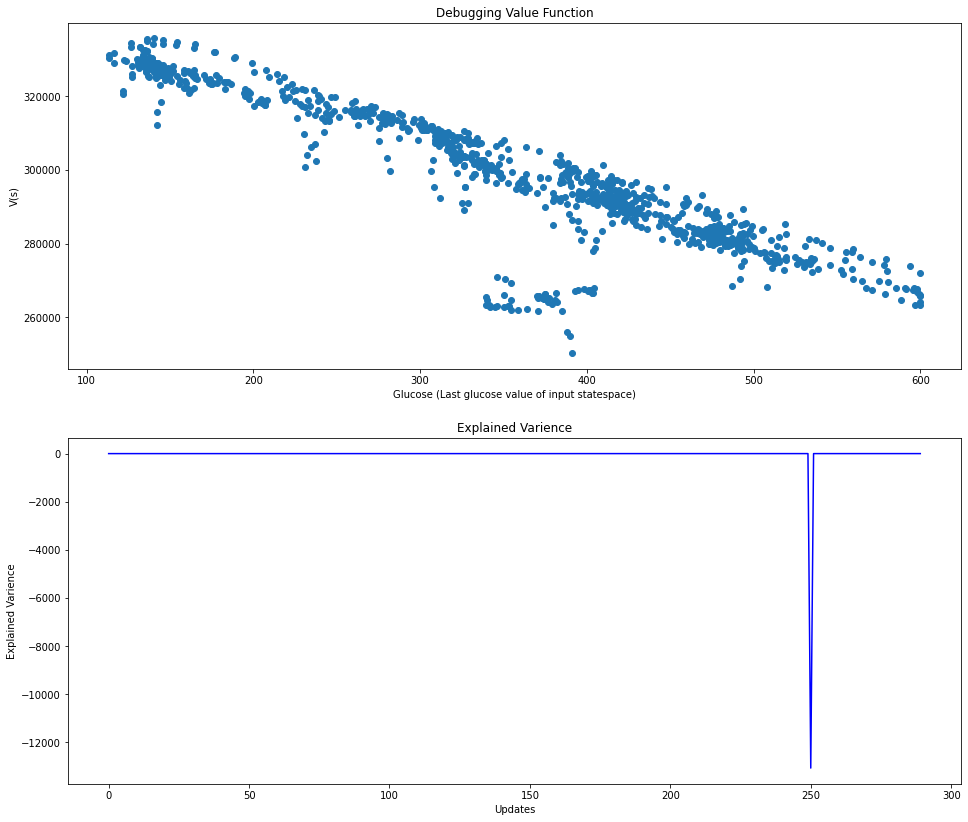

In [78]:
explained_var = pd.read_csv(MAIN_PATH + '/explained_var.csv')
fig = plt.figure(figsize=(16, 14))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

def get_concat_recent(path, seeds, filename, column):
    path = path + filename
    full_arr, refined = [], []
    FILES = [ path + str(seed)+'.csv' for seed in seeds]
    for file in FILES:
        d = pd.read_csv(file)
        full_arr.append(d[column][-48:])
    data = pd.concat(full_arr, axis=0)
    return data

data_glucose = get_concat_recent(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'glucose')
data_state_val = get_concat_recent(MAIN_PATH, training_seeds, 'training/data/action_summary_', 'state_value')
ax.scatter(data_glucose, data_state_val)
ax.set_title('Debugging Value Function')
ax.set_xlabel('Glucose (Last glucose value of input statespace)')
ax.set_ylabel('V(s)')


ax2.plot(explained_var['exp_var'], '-b', label="explained_var")
ax2.set_title('Explained Varience')
ax2.set_xlabel('Updates')
ax2.set_ylabel('Explained Varience')

plt.show()
